In [1]:
import mne
from mne.preprocessing import ICA
from mne.io import read_raw_eeglab
from mne.filter import filter_data
import matplotlib.pyplot as plt

In [2]:
from mne.io import read_raw_eeglab
from mne.time_frequency import tfr_array_morlet
from mne.preprocessing import ICA
from mne.channels import make_standard_montage

In [3]:
import numpy as np
import pandas as pd
import os

In [4]:
participant_ids = [f"sub-{str(i).zfill(3)}" for i in range(1, 21)]  # Generate participant IDs
sound_names = [f"ses-{str(i).zfill(2)}" for i in range(10, 11)]  # Generate session names (sounds)
common_path = '/Users/mac/Desktop/cad_data/ds003774/'

In [5]:
participant_ids

['sub-001',
 'sub-002',
 'sub-003',
 'sub-004',
 'sub-005',
 'sub-006',
 'sub-007',
 'sub-008',
 'sub-009',
 'sub-010',
 'sub-011',
 'sub-012',
 'sub-013',
 'sub-014',
 'sub-015',
 'sub-016',
 'sub-017',
 'sub-018',
 'sub-019',
 'sub-020']

In [6]:
sound_names

['ses-10']

In [7]:
raw_data = {}
for participant_id in participant_ids:
    raw_data[participant_id] = {}
    for sound_name in sound_names:
        eeg_folder = os.path.join(common_path, participant_id, sound_name, 'eeg')
        run_number = int(sound_name.split('-')[1])
        eeg_filename = f"{participant_id}_{sound_name}_task-MusicListening_run-{run_number}_eeg.set"
        file_path = os.path.join(eeg_folder, eeg_filename)
        print(f"Attempting to load: {file_path}")  # Print the file path
        if os.path.exists(file_path):
            raw = read_raw_eeglab(file_path, preload=True)
            raw_data[participant_id][sound_name] = raw
        else:
            print(f"File not found: {file_path}")  # Print a message if the file does not exist

Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-001/ses-10/eeg/sub-001_ses-10_task-MusicListening_run-10_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_6361/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_6361/2948929371.py:11: RuntimeWarning: Omitted 106 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_6361/2948929371.py:11: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_6361/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  r

Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-002/ses-10/eeg/sub-002_ses-10_task-MusicListening_run-10_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_6361/2948929371.py:11: RuntimeWarning: Omitted 106 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_6361/2948929371.py:11: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_6361/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_6361/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  r

Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-003/ses-10/eeg/sub-003_ses-10_task-MusicListening_run-10_eeg.set
Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-004/ses-10/eeg/sub-004_ses-10_task-MusicListening_run-10_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_6361/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_6361/2948929371.py:11: RuntimeWarning: Omitted 106 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_6361/2948929371.py:11: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_6361/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  r

Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-005/ses-10/eeg/sub-005_ses-10_task-MusicListening_run-10_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_6361/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_6361/2948929371.py:11: RuntimeWarning: Omitted 106 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_6361/2948929371.py:11: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_6361/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  r

Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-006/ses-10/eeg/sub-006_ses-10_task-MusicListening_run-10_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_6361/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_6361/2948929371.py:11: RuntimeWarning: Omitted 106 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_6361/2948929371.py:11: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_6361/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  r

Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-007/ses-10/eeg/sub-007_ses-10_task-MusicListening_run-10_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_6361/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_6361/2948929371.py:11: RuntimeWarning: Omitted 106 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_6361/2948929371.py:11: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_6361/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  r

Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-008/ses-10/eeg/sub-008_ses-10_task-MusicListening_run-10_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_6361/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_6361/2948929371.py:11: RuntimeWarning: Omitted 106 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_6361/2948929371.py:11: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_6361/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  r

Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-009/ses-10/eeg/sub-009_ses-10_task-MusicListening_run-10_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_6361/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_6361/2948929371.py:11: RuntimeWarning: Omitted 106 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_6361/2948929371.py:11: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_6361/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  r

Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-010/ses-10/eeg/sub-010_ses-10_task-MusicListening_run-10_eeg.set
Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-011/ses-10/eeg/sub-011_ses-10_task-MusicListening_run-10_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_6361/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_6361/2948929371.py:11: RuntimeWarning: Omitted 110 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_6361/2948929371.py:11: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_6361/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  r

Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-012/ses-10/eeg/sub-012_ses-10_task-MusicListening_run-10_eeg.set
Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-013/ses-10/eeg/sub-013_ses-10_task-MusicListening_run-10_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_6361/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_6361/2948929371.py:11: RuntimeWarning: Omitted 106 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_6361/2948929371.py:11: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_6361/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  r

Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-014/ses-10/eeg/sub-014_ses-10_task-MusicListening_run-10_eeg.set
Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-015/ses-10/eeg/sub-015_ses-10_task-MusicListening_run-10_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_6361/2948929371.py:11: RuntimeWarning: Omitted 106 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_6361/2948929371.py:11: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_6361/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_6361/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  r

Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-016/ses-10/eeg/sub-016_ses-10_task-MusicListening_run-10_eeg.set
Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-017/ses-10/eeg/sub-017_ses-10_task-MusicListening_run-10_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_6361/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_6361/2948929371.py:11: RuntimeWarning: Omitted 106 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_6361/2948929371.py:11: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_6361/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  r

Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-018/ses-10/eeg/sub-018_ses-10_task-MusicListening_run-10_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_6361/2948929371.py:11: RuntimeWarning: Omitted 106 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_6361/2948929371.py:11: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_6361/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_6361/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  r

Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-019/ses-10/eeg/sub-019_ses-10_task-MusicListening_run-10_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_6361/2948929371.py:11: RuntimeWarning: Omitted 106 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_6361/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_6361/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw = read_raw_eeglab(file_path, preload=True)


Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-020/ses-10/eeg/sub-020_ses-10_task-MusicListening_run-10_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_6361/2948929371.py:11: RuntimeWarning: Omitted 106 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_6361/2948929371.py:11: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_6361/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(file_path, preload=True)


In [8]:
# Define frequency bands of interest
bands = {'delta': (0.5, 4),
         'theta': (4, 8),
         'alpha': (8, 13),
         'beta': (13, 30),
         'gamma': (30, 100)}

In [9]:
# Create a separate dictionary to store band powers
band_powers_data = {}

In [10]:
# Preprocess and extract frequency bands for each participant and sound
for participant_id in participant_ids:
    if participant_id not in band_powers_data:
        band_powers_data[participant_id] = {}
    for sound_name in sound_names:
        print(f"Processing participant: {participant_id}, sound: {sound_name}")

        raw = raw_data[participant_id][sound_name]

        # Apply filters
        raw.filter(l_freq=0.5, h_freq=100)

        # Remove artifacts (using ICA method)
        ica = ICA(n_components=20, random_state=42)
        ica.fit(raw)
        ica.exclude = []  
        raw_clean = raw.copy()
        ica.apply(raw_clean)

        # Calculate power spectral density (PSD) using the compute_psd method
        spectrum = raw.compute_psd(method="welch")
        
        # Get the data and frequencies from the spectrum object
        data, freqs = spectrum.get_data(return_freqs=True)
        
        # Extract power in each frequency band
        band_powers = {}
        for band, (l_freq, h_freq) in bands.items():
            idx_band = np.logical_and(freqs >= l_freq, freqs <= h_freq)
            band_power = np.sum(data[:, idx_band], axis=-1)
            band_powers[band] = band_power

        # Save band powers in band_powers_data dictionary
        band_powers_data[participant_id][sound_name] = band_powers


Processing participant: sub-001, sound: ses-10
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (6.604 sec)

Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.1s finished


Selecting by number: 20 components
Fitting ICA took 1.1s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 1.024 (s)
Processing participant: sub-002, sound: ses-10
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 6601 samples (6.601 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_6361/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.4s finished


Selecting by number: 20 components
Fitting ICA took 4.2s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 0.256 (s)
Processing participant: sub-003, sound: ses-10
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (6.604 sec)

Fitting ICA to data using 129 channels (please be patient, this may take a while)


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_6361/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.1s finished


Selecting by number: 20 components
Fitting ICA took 10.0s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 1.024 (s)
Processing participant: sub-004, sound: ses-10
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 6601 samples (6.601 sec)



/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/decomposition/_fastica.py:123: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_6361/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.4s finished


Selecting by number: 20 components
Fitting ICA took 4.0s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 0.256 (s)
Processing participant: sub-005, sound: ses-10
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 6601 samples (6.601 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_6361/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.4s finished


Selecting by number: 20 components
Fitting ICA took 4.5s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 0.256 (s)
Processing participant: sub-006, sound: ses-10
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 6601 samples (6.601 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_6361/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.4s finished


Selecting by number: 20 components
Fitting ICA took 4.8s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 0.256 (s)
Processing participant: sub-007, sound: ses-10
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 6601 samples (6.601 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_6361/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.4s finished


Selecting by number: 20 components
Fitting ICA took 4.4s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_6361/3553102114.py:15: RuntimeWarning: Using n_components=20 (resulting in n_components_=20) may lead to an unstable mixing matrix estimation because the ratio between the largest (1.3e+02) and smallest (7.3e-05) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 14
  ica.fit(raw)


Effective window size : 0.256 (s)
Processing participant: sub-008, sound: ses-10
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 6601 samples (6.601 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_6361/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.4s finished


Selecting by number: 20 components
Fitting ICA took 4.5s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 0.256 (s)
Processing participant: sub-009, sound: ses-10
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 6601 samples (6.601 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_6361/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.4s finished


Selecting by number: 20 components
Fitting ICA took 9.5s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 0.256 (s)
Processing participant: sub-010, sound: ses-10
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (6.604 sec)

Fitting ICA to data using 129 channels (please be patient, this may take a while)


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_6361/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.1s finished


Selecting by number: 20 components
Fitting ICA took 0.9s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 1.024 (s)
Processing participant: sub-011, sound: ses-10
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (6.604 sec)

Fitting ICA to data using 129 channels (please be patient, this may take a while)


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_6361/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.1s finished


Selecting by number: 20 components
Fitting ICA took 10.1s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 1.024 (s)
Processing participant: sub-012, sound: ses-10
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (6.604 sec)



/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/decomposition/_fastica.py:123: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_6361/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.1s finished


Selecting by number: 20 components
Fitting ICA took 0.9s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 1.024 (s)
Processing participant: sub-013, sound: ses-10
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (6.604 sec)

Fitting ICA to data using 129 channels (please be patient, this may take a while)


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_6361/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.1s finished


Selecting by number: 20 components
Fitting ICA took 1.8s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 1.024 (s)
Processing participant: sub-014, sound: ses-10
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (6.604 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_6361/3553102114.py:15: RuntimeWarning: Using n_components=20 (resulting in n_components_=20) may lead to an unstable mixing matrix estimation because the ratio between the largest (1.2e+02) and smallest (1.3e-05) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 11
  ica.fit(raw)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_6361/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.1s finished


Selecting by number: 20 components
Fitting ICA took 1.2s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 1.024 (s)
Processing participant: sub-015, sound: ses-10
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (6.604 sec)

Fitting ICA to data using 129 channels (please be patient, this may take a while)


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_6361/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.1s finished


Selecting by number: 20 components
Fitting ICA took 1.1s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 1.024 (s)
Processing participant: sub-016, sound: ses-10
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (6.604 sec)

Fitting ICA to data using 129 channels (please be patient, this may take a while)


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_6361/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.1s finished


Selecting by number: 20 components
Fitting ICA took 10.2s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 1.024 (s)
Processing participant: sub-017, sound: ses-10
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 6601 samples (6.601 sec)



/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/decomposition/_fastica.py:123: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_6361/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.4s finished


Selecting by number: 20 components
Fitting ICA took 4.8s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 0.256 (s)
Processing participant: sub-018, sound: ses-10
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 6601 samples (6.601 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_6361/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.4s finished


Selecting by number: 20 components
Fitting ICA took 36.9s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components


/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/decomposition/_fastica.py:123: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


Effective window size : 0.256 (s)
Processing participant: sub-019, sound: ses-10
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 6601 samples (6.601 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_6361/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.4s finished


Selecting by number: 20 components
Fitting ICA took 4.6s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 0.256 (s)
Processing participant: sub-020, sound: ses-10
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 6601 samples (6.601 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_6361/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.4s finished


Selecting by number: 20 components
Fitting ICA took 5.1s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 0.256 (s)


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_6361/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")


In [11]:
# Calculate the average power in each frequency band for each participant and sound
avg_band_powers = {}

In [12]:
for participant_id in participant_ids:
    avg_band_powers[participant_id] = {}
    
    for sound_name in sound_names:
        band_powers = band_powers_data[participant_id][sound_name]
        
        avg_powers = {}
        for band in bands:
            avg_power = np.mean(band_powers[band])
            avg_powers[band] = avg_power
            
        avg_band_powers[participant_id][sound_name] = avg_powers

In [13]:
def plot_band_power(participant_id,band_name):
    band_powers = []
    song_names = []
    for sound_name in sound_names:
        band_powers.append(avg_band_powers[participant_id][sound_name][band_name])
        song_names.append(sound_name.split('-')[-1])
    
for band in bands:
    for participant_id in participant_ids:
        plot_band_power(participant_id, band)

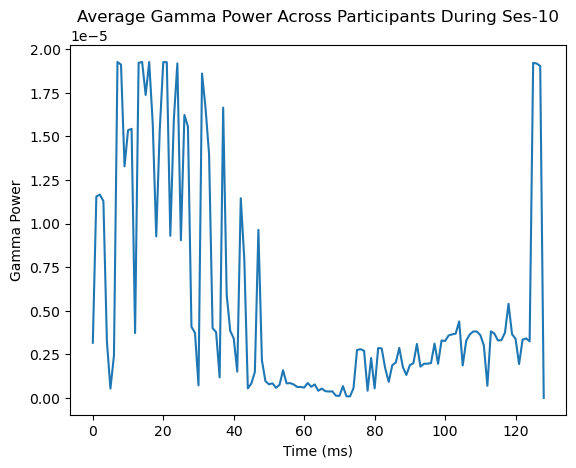

In [14]:
# Define the session of interest
session = 'ses-10'

# Initialize a list to store gamma powers for all participants
gamma_powers = []

# Loop through each participant
for participant_id in participant_ids:
    # Get the gamma powers for the specified session
    gamma_powers_participant = band_powers_data[participant_id][session]['gamma']
    # Append the gamma powers to the list
    gamma_powers.append(gamma_powers_participant)

# Calculate the average gamma power across all participants at each time point
avg_gamma_powers = np.mean(gamma_powers, axis=0)

# Plot the average gamma power
plt.plot(avg_gamma_powers)
plt.title('Average Gamma Power Across Participants During Ses-10')
plt.xlabel('Time (ms)')
plt.ylabel('Gamma Power')
plt.show()


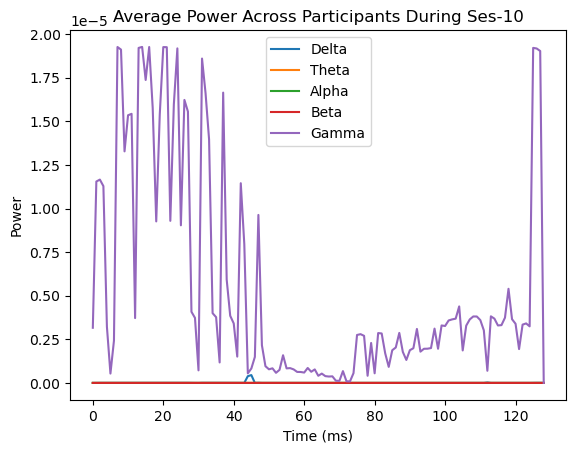

In [15]:
# Define the session of interest
session = 'ses-10'

# Initialize lists to store the power values for all participants
delta_powers = []
theta_powers = []
alpha_powers = []
beta_powers = []
gamma_powers = []

# Loop through each participant
for participant_id in participant_ids:
    # Get the power values for the specified session and frequency bands
    delta_powers_participant = band_powers_data[participant_id][session]['delta']
    theta_powers_participant = band_powers_data[participant_id][session]['theta']
    alpha_powers_participant = band_powers_data[participant_id][session]['alpha']
    beta_powers_participant = band_powers_data[participant_id][session]['beta']
    gamma_powers_participant = band_powers_data[participant_id][session]['gamma']
    
    # Append the power values to the corresponding lists
    delta_powers.append(delta_powers_participant)
    theta_powers.append(theta_powers_participant)
    alpha_powers.append(alpha_powers_participant)
    beta_powers.append(beta_powers_participant)
    gamma_powers.append(gamma_powers_participant)

# Calculate the average power values across all participants at each time point
avg_delta_powers = np.mean(delta_powers, axis=0)
avg_theta_powers = np.mean(theta_powers, axis=0)
avg_alpha_powers = np.mean(alpha_powers, axis=0)
avg_beta_powers = np.mean(beta_powers, axis=0)
avg_gamma_powers = np.mean(gamma_powers, axis=0)

# Plot the average power values for all frequency bands
plt.plot(avg_delta_powers, label='Delta')
plt.plot(avg_theta_powers, label='Theta')
plt.plot(avg_alpha_powers, label='Alpha')
plt.plot(avg_beta_powers, label='Beta')
plt.plot(avg_gamma_powers, label='Gamma')
plt.title('Average Power Across Participants During Ses-10')
plt.xlabel('Time (ms)')
plt.ylabel('Power')
plt.legend()
plt.show()

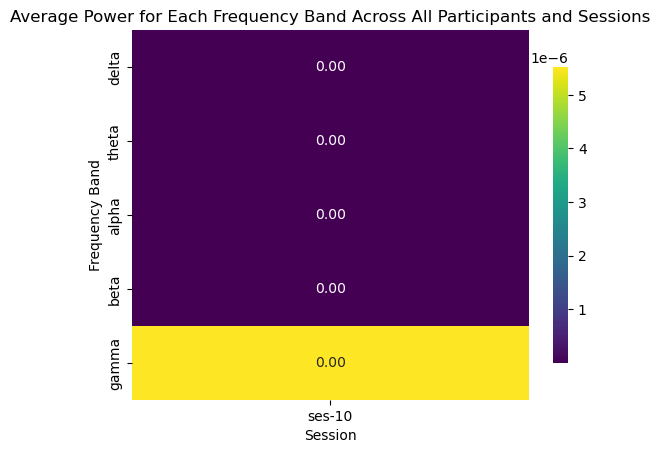

In [16]:
import seaborn as sns

# Define the frequency bands
bands = ['delta', 'theta', 'alpha', 'beta', 'gamma']

# Initialize a list to store the average band powers for all sessions
avg_band_powers = []

# Loop through each frequency band
for band in bands:
    # Initialize a list to store the average band powers for all sessions for the current band
    avg_band_powers_band = []
    
    # Loop through each session
    for session in sound_names:
        # Initialize a list to store the average band powers for all participants for the current session and band
        avg_band_powers_session = []
        
        # Loop through each participant
        for participant_id in participant_ids:
            # Get the band powers for the current participant, session, and band
            band_powers_participant = band_powers_data[participant_id][session][band]
            
            # Calculate the average band power for the current participant, session, and band
            avg_band_power_participant = np.mean(band_powers_participant)
            
            # Append the average band power to the list
            avg_band_powers_session.append(avg_band_power_participant)
        
        # Calculate the average band power across all participants for the current session and band
        avg_band_power_session = np.mean(avg_band_powers_session)
        
        # Append the average band power to the list
        avg_band_powers_band.append(avg_band_power_session)
    
    # Append the list of average band powers for the current band to the list
    avg_band_powers.append(avg_band_powers_band)

# Create a heatmap of the average power for each frequency band across all participants and sessions
ax = sns.heatmap(avg_band_powers, cmap='viridis', xticklabels=sound_names, yticklabels=bands, annot=True, fmt='.2f', cbar_kws={'shrink': .8})
plt.title('Average Power for Each Frequency Band Across All Participants and Sessions')
plt.xlabel('Session')
plt.ylabel('Frequency Band')
plt.show()


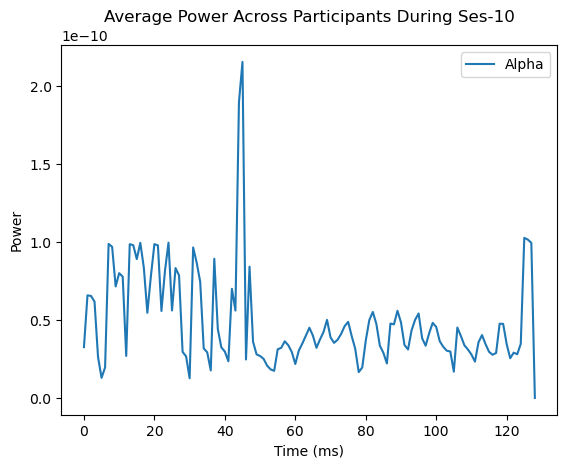

In [17]:
# Define the session of interest
session = 'ses-10'

# Initialize lists
alpha_powers = []

# Loop through each participant
for participant_id in participant_ids:
    # Get the power values for the specified session and frequency bands
    alpha_powers_participant = band_powers_data[participant_id][session]['alpha']
    
    # Append the power values to the corresponding 
    alpha_powers.append(alpha_powers_participant)

# Calculate the average power values across all par
avg_alpha_powers = np.mean(alpha_powers, axis=0)

# Plot the average power values for all frequency bands
plt.plot(avg_alpha_powers, label='Alpha')
plt.title('Average Power Across Participants During Ses-10')
plt.xlabel('Time (ms)')
plt.ylabel('Power')
plt.legend()
plt.show()


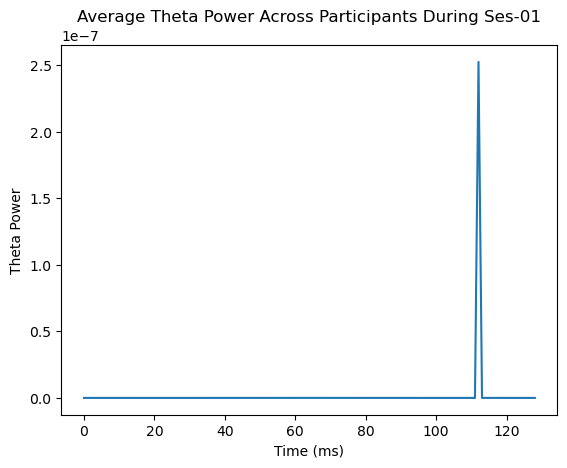

In [16]:
# Define the session of interest
session = 'ses-01'

# Initialize a list to store gamma powers for all participants
theta_powers = []

# Loop through each participant
for participant_id in participant_ids:
    # Get the gamma powers for the specified session
    theta_powers_participant = band_powers_data[participant_id][session]['theta']
    # Append the gamma powers to the list
    theta_powers.append(theta_powers_participant)

# Calculate the average gamma power across all participants at each time point
avg_theta_powers = np.mean(theta_powers, axis=0)

# Plot the average gamma power
plt.plot(avg_theta_powers)
plt.title('Average Theta Power Across Participants During Ses-01')
plt.xlabel('Time (ms)')
plt.ylabel('Theta Power')
plt.show()



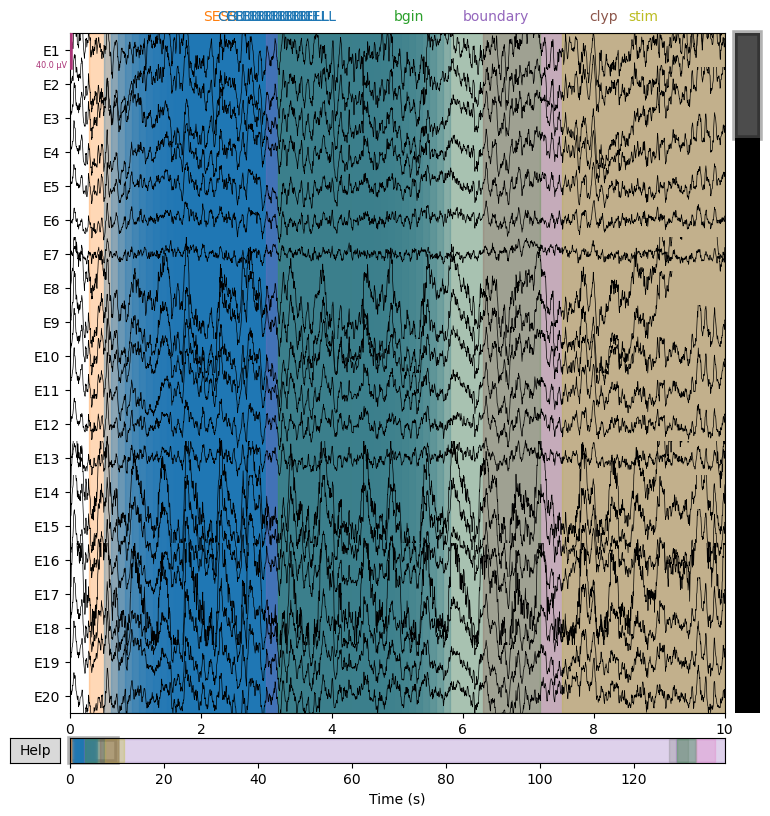

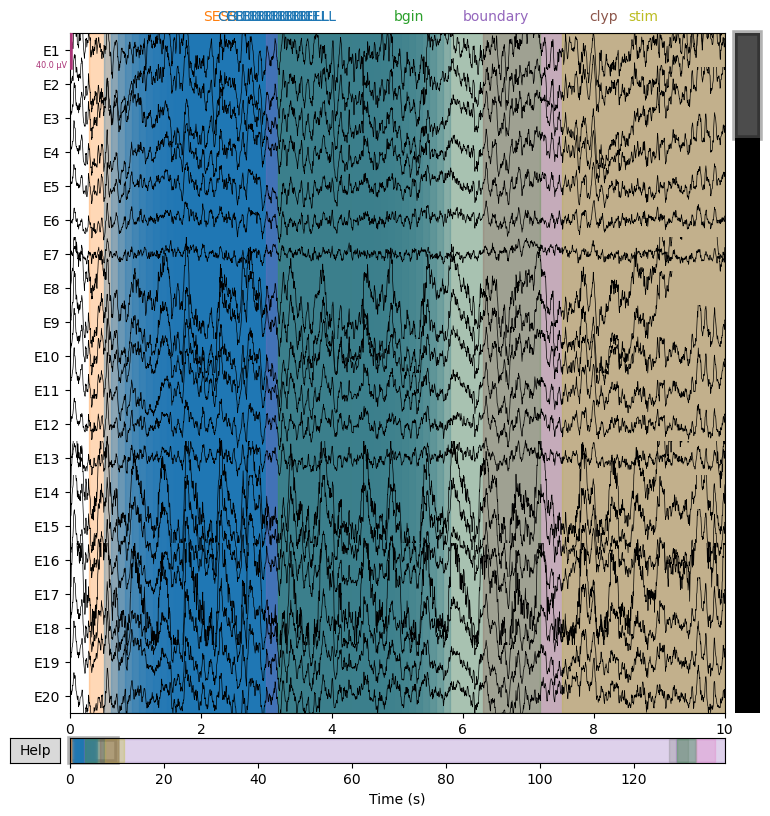

In [29]:
participant_id = 'sub-012'
sound_name = 'ses-10'
raw = raw_data[participant_id][sound_name]
raw.plot()

In [7]:
# Select the EEG data for participant 1 and session 1
raw = raw_data['sub-012']['ses-10']
raw.filter(1,80)
# Plot the EEG data
raw.plot()